<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


Import pandas module


In [96]:
import pandas as pd


Import matplotlib


In [97]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [98]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [99]:
df.duplicated().sum()

0

In [100]:
df[df.duplicated()]

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [102]:
duplicated = df[df.duplicated(['RemoteWork', 'Employment', 'MainBranch'], keep=False)] # keep=False marks all duplicates as True


In [103]:
duplicated['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    22974
Remote                                  20779
In-person                               10923
Name: count, dtype: int64

In [104]:
duplicated['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                                       39038
Independent contractor, freelancer, or self-employed                                                                                                                       4844
Student, full-time                                                                                                                                                         4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                   3557
Not employed, but looking for work                                                                                                                                         2341
                                                                                                             

In [105]:
duplicated['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           50161
I am not primarily a developer, but I write code sometimes as part of my work/studies     6468
I am learning to code                                                                     3845
I code primarily as a hobby                                                               3314
I used to be a developer by profession, but no longer am                                  1482
Name: count, dtype: int64

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


(-1.09999622563553, 1.0999998202683585, -1.0999999195084773, 1.099998826233578)

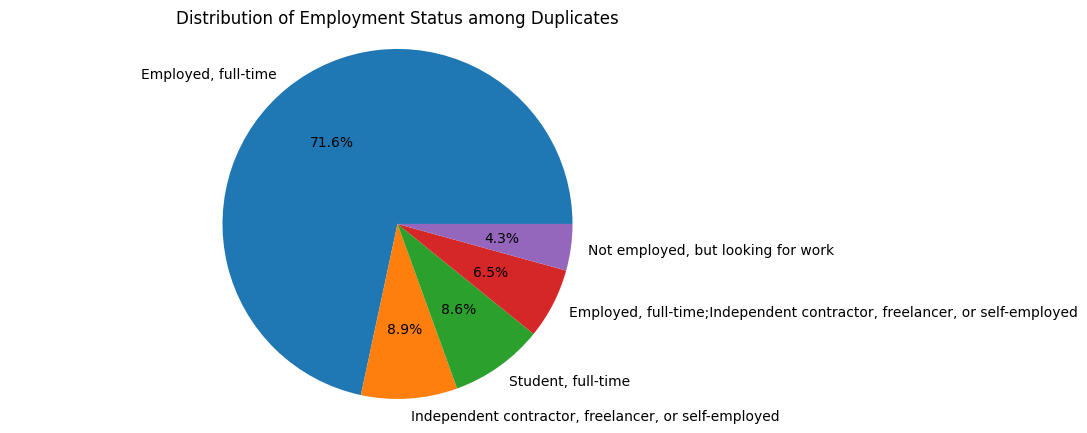

In [106]:
employment_count = duplicated['Employment'].value_counts().head()
plt.figure(figsize=(10, 5))
plt.pie(employment_count.values, labels=employment_count.index, autopct='%1.1f%%')
plt.title('Distribution of Employment Status among Duplicates')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


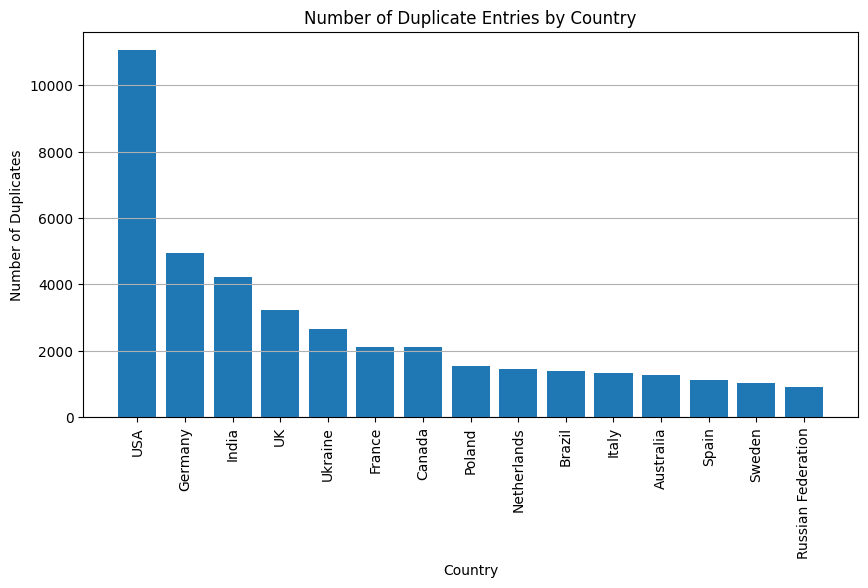

In [107]:
duplicated.loc[:, 'Country'] = duplicated['Country'].replace({
    "United States of America": "USA",
    "United Kingdom of Great Britain and Northern Ireland": "UK"
})

country_count = duplicated['Country'].value_counts().head(15)
plt.figure(figsize=(10, 5))
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Duplicates')
plt.title('Number of Duplicate Entries by Country')
plt.grid(axis='y')  

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [111]:
df_cleaned = df.drop_duplicates(["MainBranch", "Employment", "RemoteWork", "Country"], keep='first')
df_cleaned

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65267,65268,I am learning to code,35-44 years old,"Independent contractor, freelancer, or self-em...",In-person,Apples,I don’t code outside of work,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...","Online challenges (e.g., daily or weekly codin...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65283,65284,I am learning to code,18-24 years old,"Employed, full-time;Student, part-time",Remote,Apples,School or academic work,"Secondary school (e.g. American high school, G...",Books / Physical media;Other online resources ...,Books;Stack Overflow;Social Media;How-to video...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65351,65352,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Apples,Bootstrapping a business;Professional developm...,Some college/university study without earning ...,Books / Physical media;On the job training;Sch...,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,8.0
65427,65428,"I am not primarily a developer, but I write co...",25-34 years old,"Not employed, but looking for work;Employed, p...",In-person,Apples,Hobby;Professional development or self-paced l...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
